In [68]:
import matplotlib.gridspec as gridspec
import warnings
from pandas import read_pickle
from sklearn.manifold import LocallyLinearEmbedding
AUTO_ENCODER_TITLE = "Autoencoder intristic dimension "
CUREENT_SAMPLE = 2000


import numpy as np
import seaborn as sns
import sklearn
import pickle
from IPython.display import display, HTML


import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import matplotlib as mpl
import plotly.express as px
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100 # from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
import numpy as np
import pandas as pd
# import some necessary functions for plotting as well as the diffusion_map class from pydiffmap.
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from pydiffmap import diffusion_map as dm

import pydiffmap
import sklearn.manifold
import sklearn
from IPython.core.display import display
from statsmodels.iolib import save_pickle
from denoising_ae import  data_prep
import plotly.express as px
import matplotlib.pyplot as plt
def d3_scatter(X,color=[],color_flag=False,df=False):
    
    if df:
        x=X.iloc[:,0]
        y=X.iloc[:,1]
        z=X.iloc[:,2]
    else:
        
        x=X[:, 0]
        y=X[:, 1]
        z=X[:, 2]
    if color:
        fig = px.scatter_3d(x=x, y=y, z=z,
                  color=color,opacity=1,color_continuous_scale='spectral')
    else:
        fig = px.scatter_3d(x=x, y=y, z=z,
                  opacity=1)
        
    fig.show()



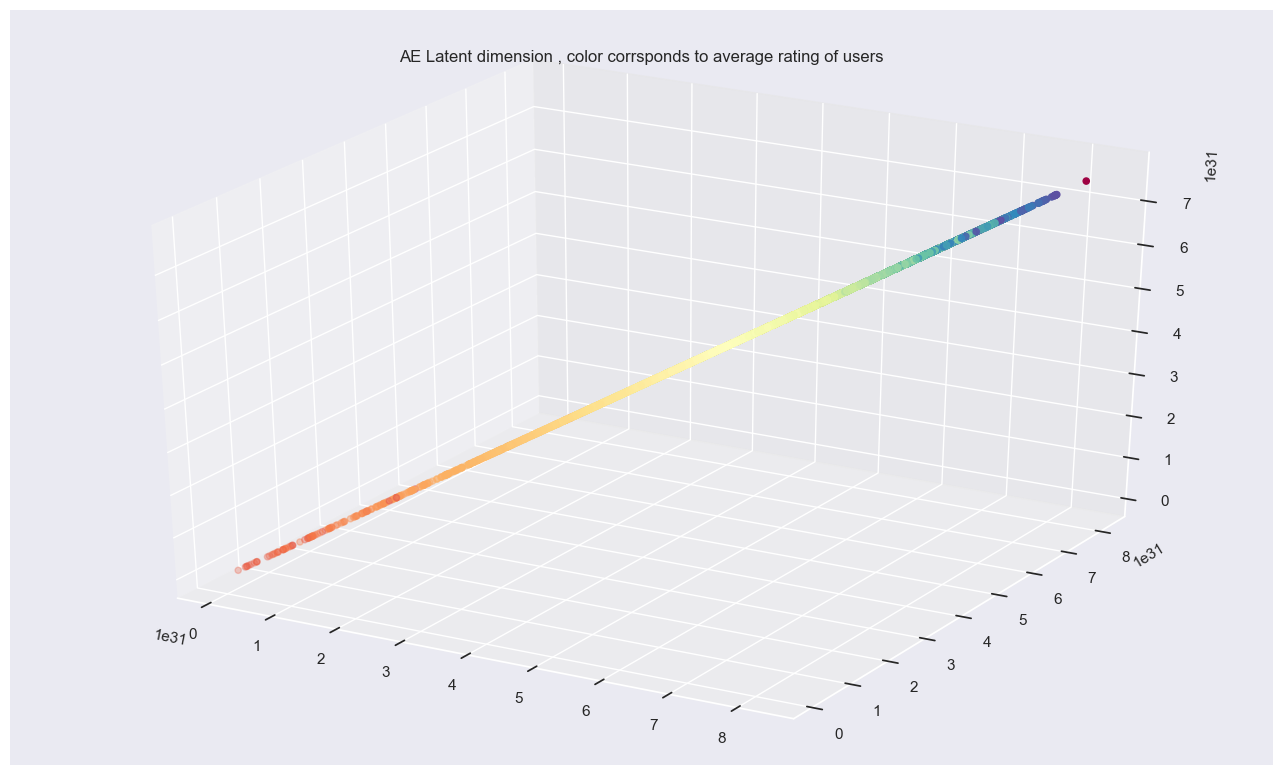

In [201]:
users_ff=pd.read_pickle("users_feature_v")
users_ff.iloc[:,31:]+=2.5
user_AE=pd.read_pickle("final_dataset_dim3.pickle")
plt
users_all=user_AE.join(users_ff)
pd.options.display.float_format = '{:.5f}'.format

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(user_AE.iloc[:, 0], user_AE.iloc[:, 1], user_AE.iloc[:, 2], c=users_all["mean_rating"], cmap=plt.cm.Spectral)
plt.title("AE Latent dimension , color corrsponds to average rating of users")
plt.show()

In [3]:
from  sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#
# fig = px.scatter_3d(data_frame=users_all.sample(n=3000),x='x', y='y', z='z',color='Animation Avg rat',opacity=1,color_continuous_scale='spectral')
# fig.show()
#
# df = px.data.gapminder()
# fig = px.scatter(df, x="x", y="y",z='z', animation_frame="year", animation_group="country",
#            size="pop", color="continent", hover_name="country",
#            log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
#
# fig["layout"].pop("updatemenus") # optional, drop animation buttons
# fig.show()



Suboptimal results regarding the auto encoder dimension  reduction , the results stems from my lack of experience with the model.
But using the line (which is **very** sparse) we can still figure out some pattern. Maybe he managed to approximate
the global structure of the data in some way?  First step is finding the 1d line using PCA and examining his
explained variance.


### Examining the explained variance revealed:




,Eigen V. 0 Explained variance,Eigen V. 1 Explained variance,Eigen V. 2 Explained variance,Eigen V. 3 Explained variance,Eigen V. 4 Explained variance,Eigen V. 5 Explained variance,Eigen V. 6 Explained variance,Eigen V. 7 Explained variance,Eigen V. 8 Explained variance,Eigen V. 9 Explained variance,Eigen V. 10 Explained variance,Eigen V. 11 Explained variance,Eigen V. 12 Explained variance
AE,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Feature vector,0.56490,0.08810,0.07793,0.03691,0.02713,0.02251,0.02152,0.02024,0.01394,0.01094,0.00989,0.00901,0.00785
Combined,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


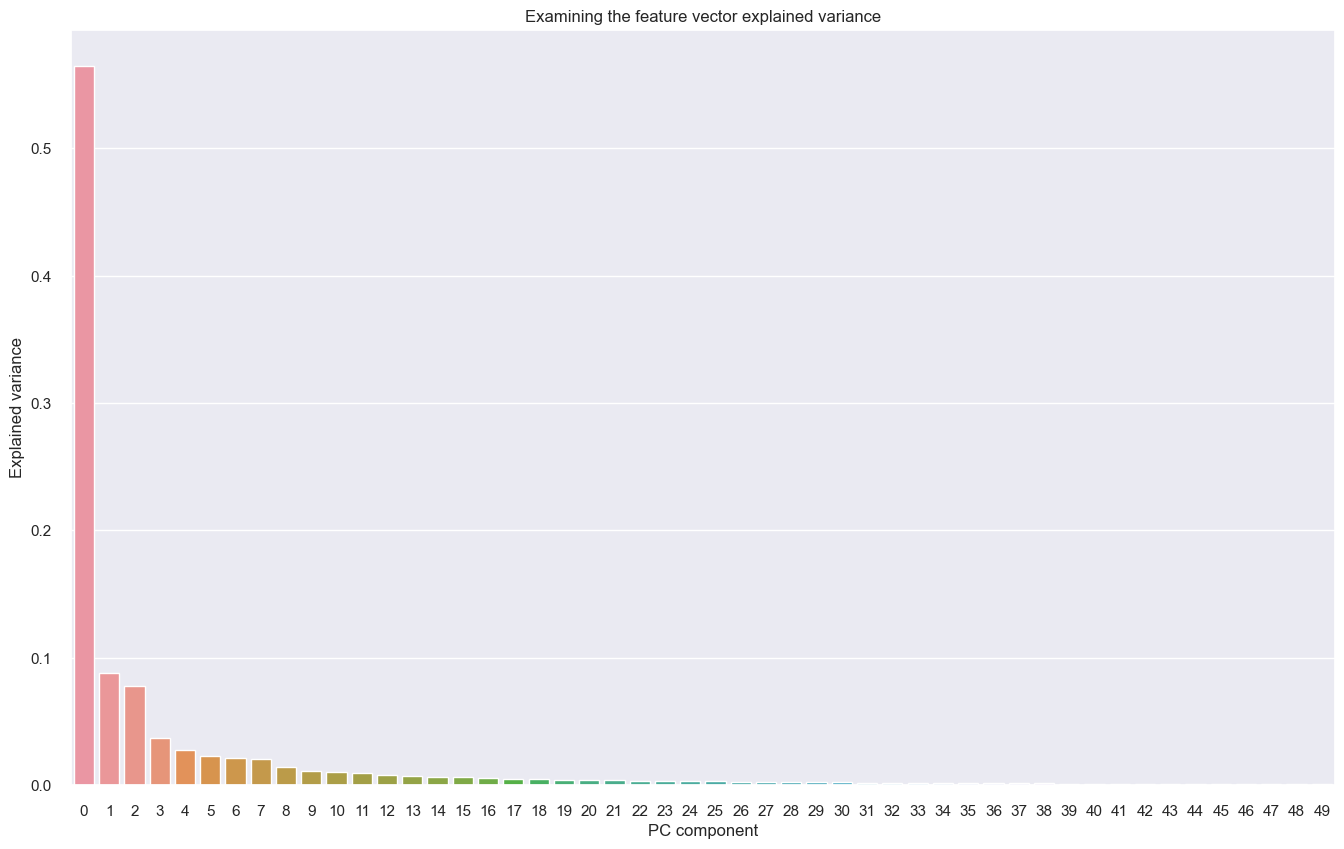

In [203]:
PC_users_ff=PCA(n_components=58)
PC_AE=PCA(n_components=3)
PC_ALL=PCA(n_components=61)

fit_AE=PC_AE.fit_transform(user_AE)

fit_user_ff=PC_users_ff.fit_transform(users_ff)

ALL_REDUCED=PC_ALL.fit_transform(users_all)
eigen_values=np.zeros((3,61))
eigen_values[0,:3]=PC_AE.explained_variance_ratio_
eigen_values[1,:58]=PC_users_ff.explained_variance_ratio_
eigen_values[2,:61]=PC_ALL.explained_variance_ratio_

a=pd.DataFrame(eigen_values)
a.set_axis(["AE","Feature vector","Combined"],axis=0,inplace=True)
EV_strings=[]
for i in range(13):
   EV_strings.append("Eigen V. {} Explained variance".format(i))

sns.barplot(x=np.arange(50),y=a.iloc[1,:50])
plt.xlabel("PC component")
plt.ylabel("Explained variance")
plt.title("Examining the feature vector explained variance")

a=a.iloc[:,:13]
a.set_axis(pd.Series(EV_strings),inplace=True,axis=1)

display(a)
#%

### After scaling  the features and PCA :
#%

- AE latent variable indeed sits on a line, and he was projected without any loss.
- The engineered  feature vector recommended dimension reduction by the PCA is 42 if we want a lossless reduction , while
the 13 first E.V holds 0.91 of the explained variance.
- Combining both datasets also reduces the dimension to 1 , I suspect it's because PCA tries to maximize a covariance ,and
since the first few values are  enormous they'll hold most of the covariance , and after scaling the values the explained variance
didn't concentrate on the first value.
 - Adding the AE points managed to increase the E.V. in the first component by 0.02 so
at least the failed attempt simplified the original data somehow.

In [187]:
from sklearn.preprocessing import scale
scaled_AE=scale(user_AE)
scaled_user_ff=scale(users_ff)
scale_user_all=scale(users_all)
PC_users_ff=PCA()
PC_AE=PCA()
PC_ALL=PCA()

fit_AE=PC_AE.fit_transform(scaled_AE)

fit_user_ff=PC_users_ff.fit_transform(scaled_user_ff)

ALL_REDUCED=PC_ALL.fit_transform(scale_user_all)
eigen_values=np.zeros((3,61))
eigen_values[0,:3]=PC_AE.explained_variance_ratio_
eigen_values[1,:58]=PC_users_ff.explained_variance_ratio_
eigen_values[2,:61]=PC_ALL.explained_variance_ratio_

a=pd.DataFrame(eigen_values)
a.set_axis(["AE","Feature vector","Combined"],axis=0,inplace=True)
EV_strings=[]
for i in range(13):
   EV_strings.append("Eigen V. {} Explained variance".format(i))

# sns.barplot(x=np.arange(50),y=a.iloc[1,:50])
# plt.xlabel("PC component explained variance")
# plt.show()
# sns.barplot(x=np.arange(50),y=a.iloc[2,:50])
# plt.xlabel("PC component explained variance")
# plt.show()

a=a.iloc[:,:13]
a.set_axis(pd.Series(EV_strings),inplace=True,axis=1)

ALL_REDUCED_FIT=pd.DataFrame.copy(users_all,True).join(pd.DataFrame(ALL_REDUCED))
ALL_REDUCED_FIT.iloc[:,:61]=scale_user_all

FF_VEC_FIT=pd.DataFrame.copy(users_ff,True).join(pd.DataFrame(fit_user_ff))
FF_VEC_FIT.iloc[:,:58]=scaled_user_ff

VE_FIT=pd.DataFrame.copy(users_all,True)
VE_FIT.iloc[:,:3]=fit_AE


In [6]:
print(VE_FIT.columns)
current_colm="Mystery"
# fig = px.scatter_3d(data_frame=VE_FIT.sample(10000),x='x', y='y',z='z',color=current_colm,opacity=0.9,color_continuous_scale='spectral',title="PCA on AE results")
# fig.show()
#
# fig = px.scatter_3d(data_frame=ALL_REDUCED_FIT.sample(4000),x=0, y=1,z=2,color=current_colm,opacity=0.9,color_continuous_scale='spectral',title="PCA on original FF combined with AE")
# fig.show()


#
#
# fig = px.scatter_3d(data_frame=FEATURE_V_REDUCE.sample(n=3000),x='x', y='y', z='z',color='Animation Avg rat',opacity=1,color_continuous_scale='spectral')
# fig.show()
#
# fig = px.scatter_3d(data_frame=ALL_REDUCED.sample(n=3000),x='x', y='y', z='z',color='Animation Avg rat',opacity=1,color_continuous_scale='spectral')
# fig.show()


Index(['x', 'y', 'z', 'mean_rating', 'std_rating', 'genre_dist_mean',
       'gengre_dist_std', 'Romance', 'Fantasy', 'Film-Noir', 'Comedy',
       'Adventure', 'News', 'Family', 'Documentary', 'Action', 'Western',
       'Reality-TV', 'War', 'Mystery', 'Game-Show', 'Talk-Show', 'Sport',
       'Crime', 'Musical', 'Horror', 'Drama', 'Short', 'Sci-Fi', 'Animation',
       'Music', 'Thriller', 'History', 'Biography', 'Romance Avg rat',
       'Fantasy Avg rat', 'Film-Noir Avg rat', 'Comedy Avg rat',
       'Adventure Avg rat', 'News Avg rat', 'Family Avg rat',
       'Documentary Avg rat', 'Action Avg rat', 'Western Avg rat',
       'Reality-TV Avg rat', 'War Avg rat', 'Mystery Avg rat',
       'Game-Show Avg rat', 'Talk-Show Avg rat', 'Sport Avg rat',
       'Crime Avg rat', 'Musical Avg rat', 'Horror Avg rat', 'Drama Avg rat',
       'Short Avg rat', 'Sci-Fi Avg rat', 'Animation Avg rat', 'Music Avg rat',
       'Thriller Avg rat', 'History Avg rat', 'Biography Avg rat'],
      dtype='

In [8]:
def scatter(X,colum,title):
    anim="Family"
    a=pd.DataFrame(X[:,:3],columns=["x","y","z"])
    a[colum]=users_all[colum][:X.shape[0]]
    a[anim]=users_all[anim][:X.shape[0]]

    fig=px.scatter_3d(data_frame=a,x='x', y='y',z='z',color=colum,color_continuous_scale='spectral',title=title,opacity=0.9)
    fig.show()
column="mean_rating"

In [ ]:
import pydiffmap.diffusion_map
CUREENT_SAMPLE=9600
# initialize Diffusion map object.
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
mydmap = dm.DiffusionMap.from_sklearn(n_evecs=3, k=13 ,epsilon=15, alpha=0.5, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
current=scaled_AE[:CUREENT_SAMPLE]
dmap = mydmap.fit_transform(current)
scatter(dmap,"mean_rating","yo")
# scatter(dmap,column,AUTO_ENCODER_TITLE)
from pydiffmap.visualization import embedding_plot, data_plot

# embedding_plot(mydmap, scatter_kwargs = {'c': dmap[:,0], 'cmap': 'Spectral'})
# data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})





In [209]:
# import pydiffmap.diffusion_map
# CUREENT_SAMPLE=20000
# # initialize Diffusion map object.
# neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}
# nn=12
# eps=30
# alpha=1
# mydmap = dm.DiffusionMap.from_sklearn(n_evecs=3, k=nn, epsilon=eps, alpha=alpha, neighbor_params=neighbor_params)
# # fit to data and return the diffusion map.
# current=ALL_REDUCED[:CUREENT_SAMPLE]
# dmap = mydmap.fit_transform(current)
# scatter(dmap,column ,"Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(CUREENT_SAMPLE,k,alpha,eps))
#
# from pydiffmap.visualization import embedding_plot, data_plot
#
# # embedding_plot(mydmap, scatter_kwargs = {'c': dmap[:,0], 'cmap': 'Spectral'})
# # data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})


In [17]:
# save_pickle(dmap,"DFM_FF20.pickle")
#
# rest_data=mydmap.transform(ALL_REDUCED[CUREENT_SAMPLE:])
# Y=np.vstack([dmap,rest_data])
# print(Y.shape)
# # scatter(Y,column ,"Feaure Vector with diff map")
# save_pickle(Y,"DFM_FF20_EXTENDED.pickle")
#
#


In [160]:
# from sklearn.manifold import LocallyLinearEmbedding
# CUREENT_SAMPLE=15000
# # 6000 , 6
# # 6 , 7500
# # 6 , 11000
# # 7 , 11000 : Global
# nn=12
# curr_model=LocallyLinearEmbedding(n_neighbors=nn,n_components=3)
# current=VE_FIT[:CUREENT_SAMPLE]
# lle_out=curr_model.fit_transform(current)
# scatter(lle_out,"mean_rating","LLE On the Autoencoder with sample size={} and n_neigbors={}".format(CUREENT_SAMPLE,nn))

(54238,)


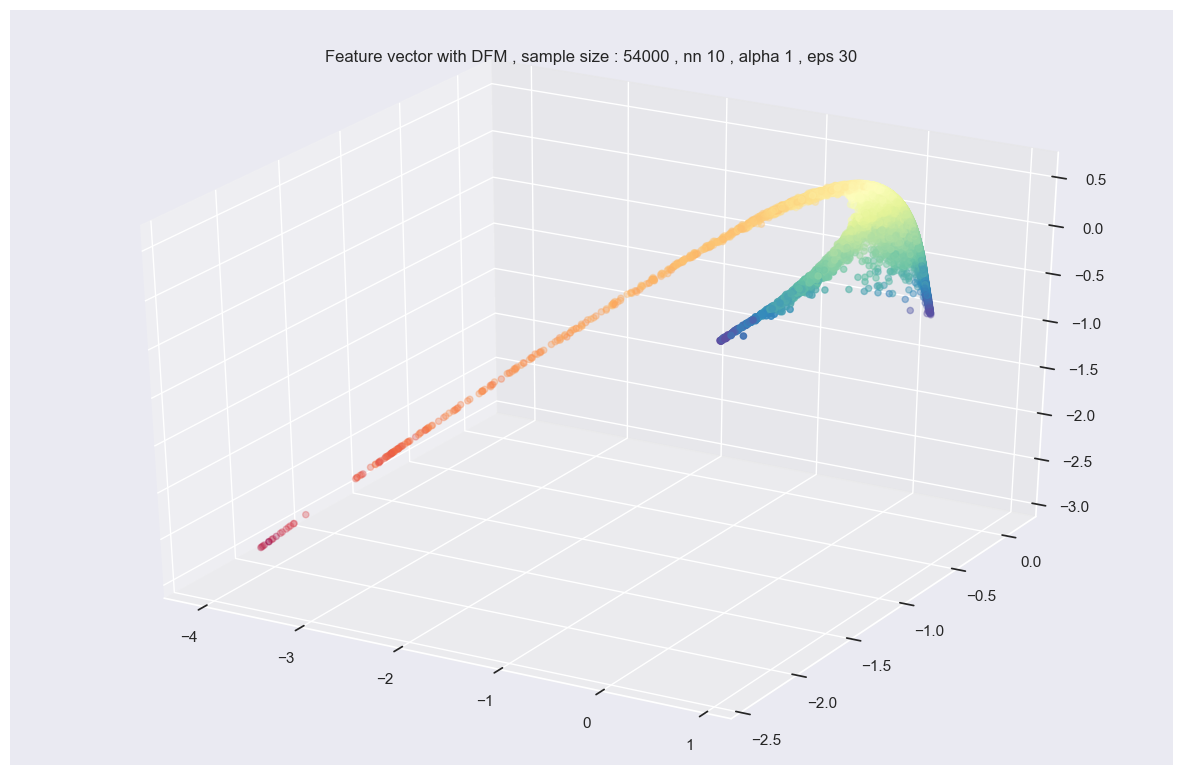

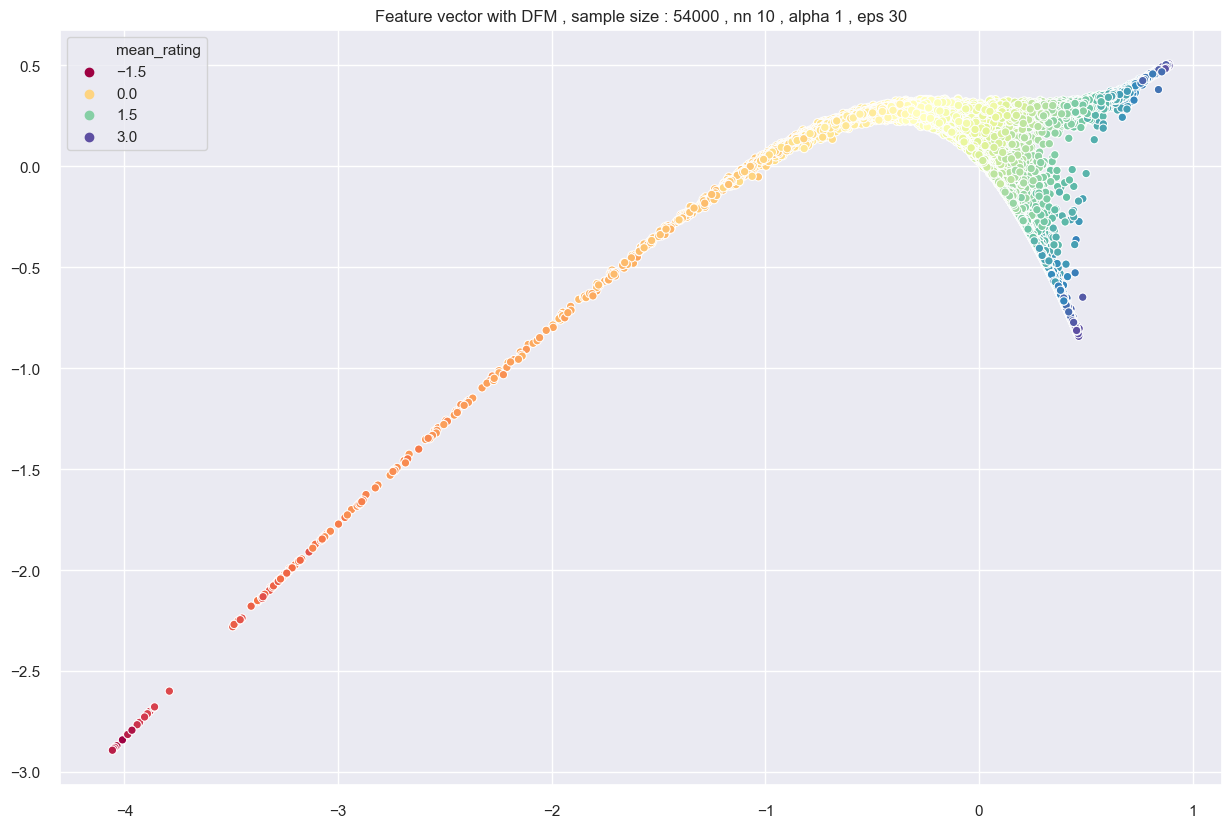

In [109]:
CURRENT_SAMPLE=15000
nn=10
LLE_AE=pd.read_pickle("FF_DFM_FULL.pickle")
# scatter(LLE_AE,"mean_rating","Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(CUREENT_SAMPLE,nn,1,30))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(LLE_AE[:, 0], LLE_AE[:, 1], LLE_AE[:, 2], c=users_all["mean_rating"], cmap=plt.cm.Spectral)
plt.title("Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(54000,10,1,30))

print(LLE_AE[:, 0].shape)
plt.show()
sns.scatterplot(x=LLE_AE[:, 0], y=LLE_AE[:, 2], hue=users_all["mean_rating"], palette=plt.cm.Spectral)
plt.title("Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(54000,10,1,30))

plt.show()

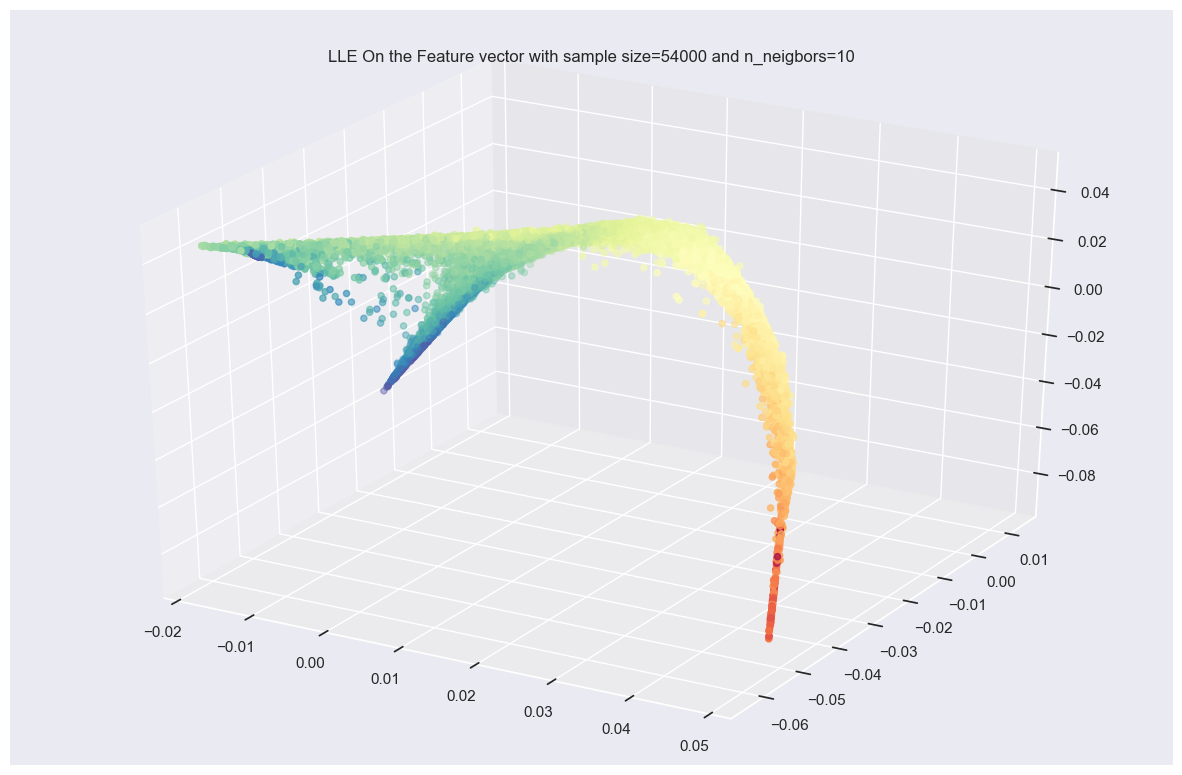

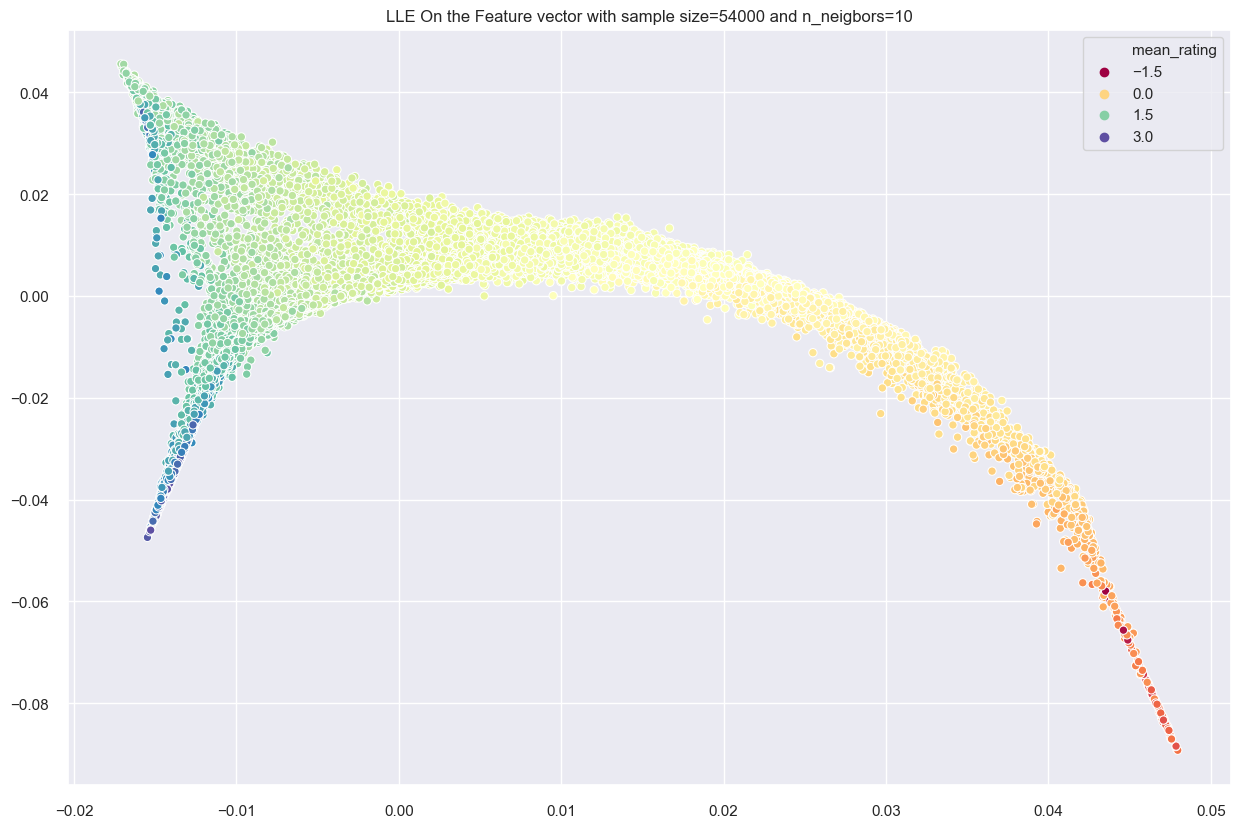

In [108]:

CURRENT_SAMPLE=15000
nn=10
LLE_AE=pd.read_pickle("LLE_all_data_claw.pickle")
# scatter(LLE_AE,"mean_rating","LLE On the Feature vector with sample size={} and n_neigbors={}".format(CURRENT_SAMPLE,nn))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(LLE_AE[:, 0], LLE_AE[:, 1], LLE_AE[:, 2], c=users_all["mean_rating"], cmap=plt.cm.Spectral)
plt.title("LLE On the Feature vector with sample size={} and n_neigbors={}".format(54000,10))
plt.show()

sns.scatterplot(x=LLE_AE[:, 0], y=LLE_AE[:, 2], hue=users_all["mean_rating"], palette=plt.cm.Spectral)
plt.title("LLE On the Feature vector with sample size={} and n_neigbors={}".format(54000,10))

plt.show()

Reality-TV Avg rat    0.85629
News Avg rat          0.79646
Film-Noir Avg rat     0.66601
Talk-Show Avg rat     0.60786
Short Avg rat         0.59309
Western Avg rat       0.49436
Sport Avg rat         0.48972
Biography Avg rat     0.45450
History Avg rat       0.45414
War Avg rat           0.45131
Animation Avg rat     0.45026
Music Avg rat         0.44487
Musical Avg rat       0.44269
Sci-Fi Avg rat        0.43485
Horror Avg rat        0.43442
Documentary Avg rat   0.43307
Fantasy Avg rat       0.43117
Family Avg rat        0.43034
Crime Avg rat         0.42762
Mystery Avg rat       0.42598
Game-Show Avg rat     0.42058
Romance Avg rat       0.41953
Adventure Avg rat     0.41711
Action Avg rat        0.41623
Comedy Avg rat        0.41571
mean_rating           0.41433
Thriller Avg rat      0.41334
Drama Avg rat         0.41019
Drama                 0.33004
Thriller              0.27591
Comedy                0.27513
Romance               0.26864
Crime                 0.21230
Action    

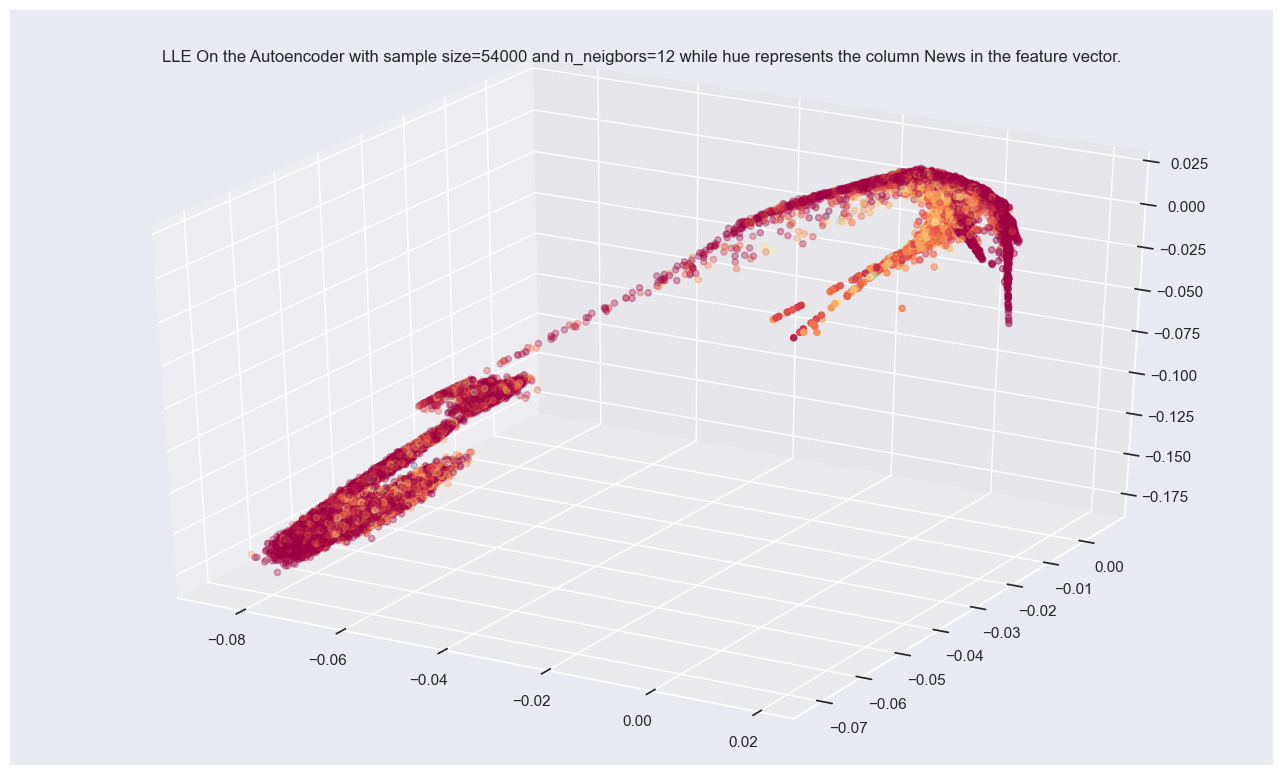

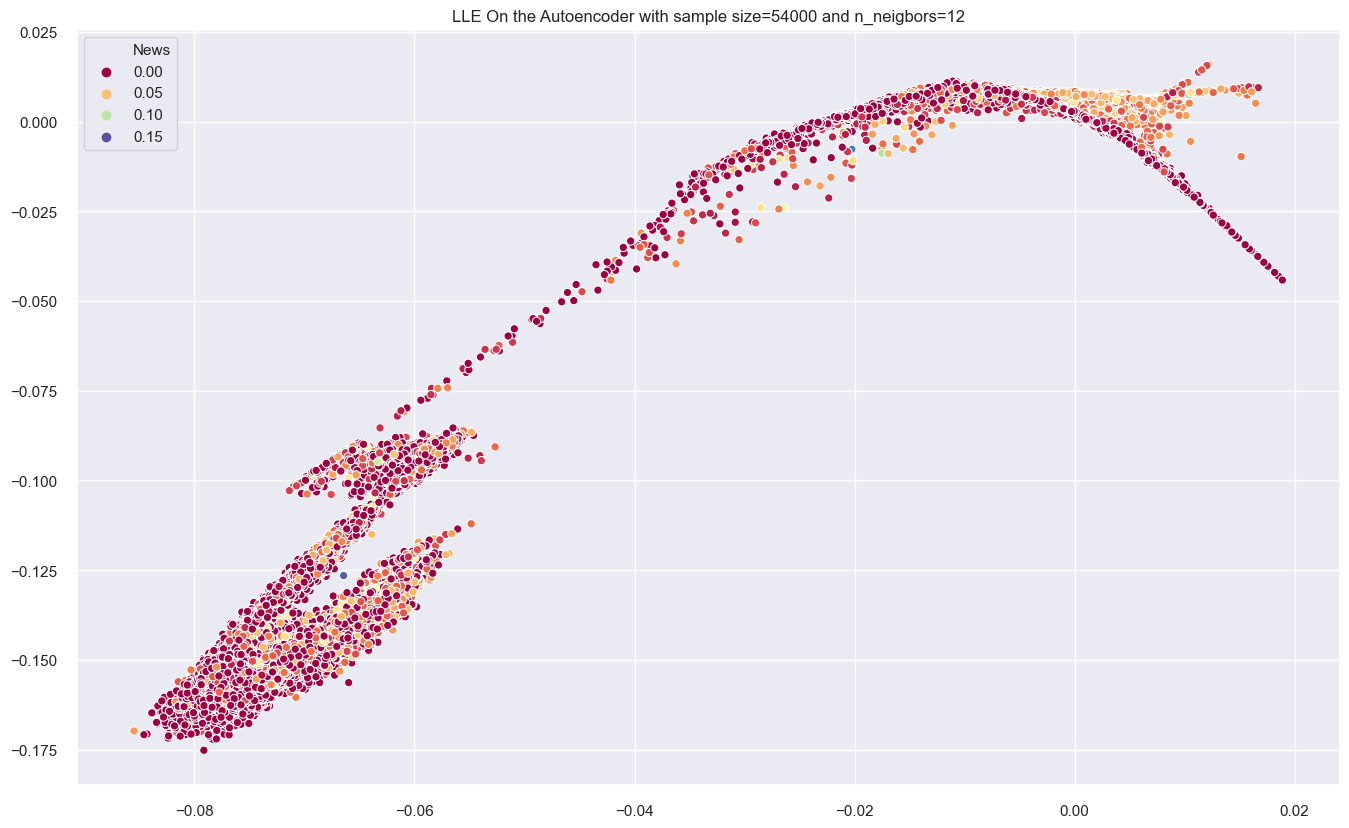

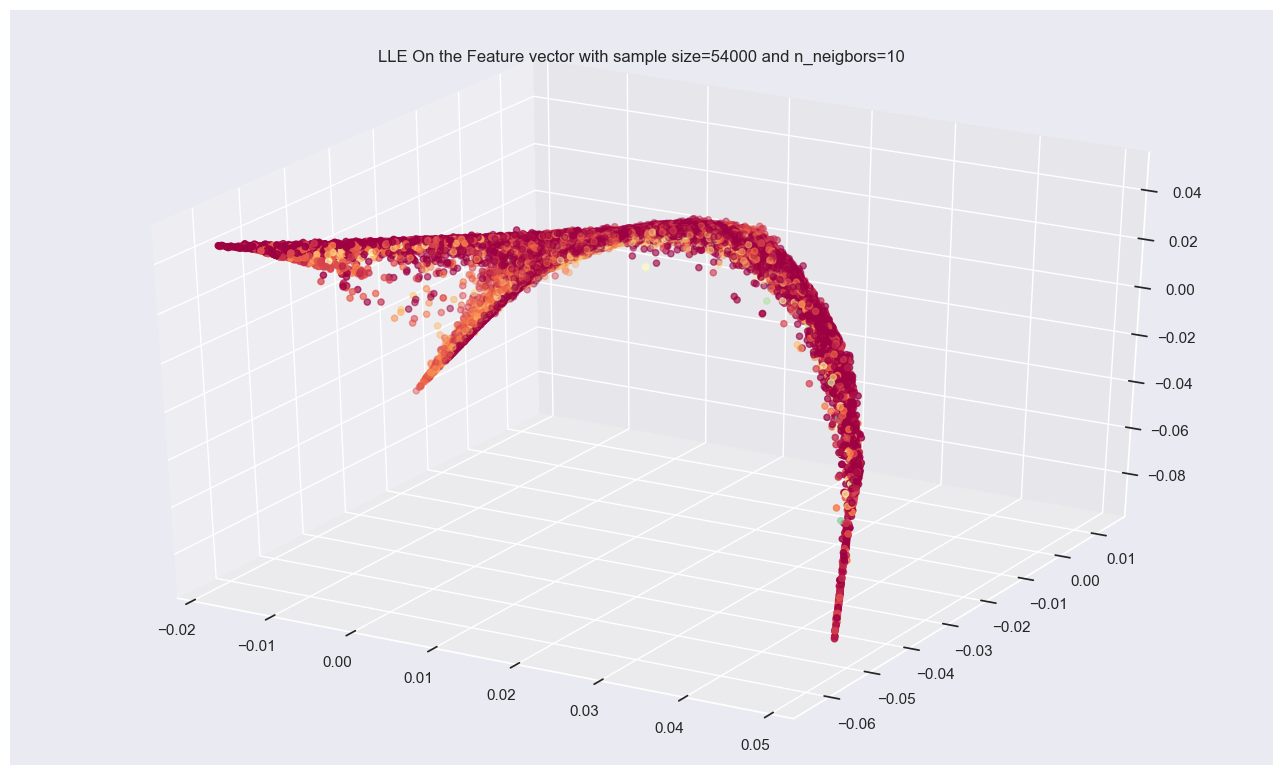

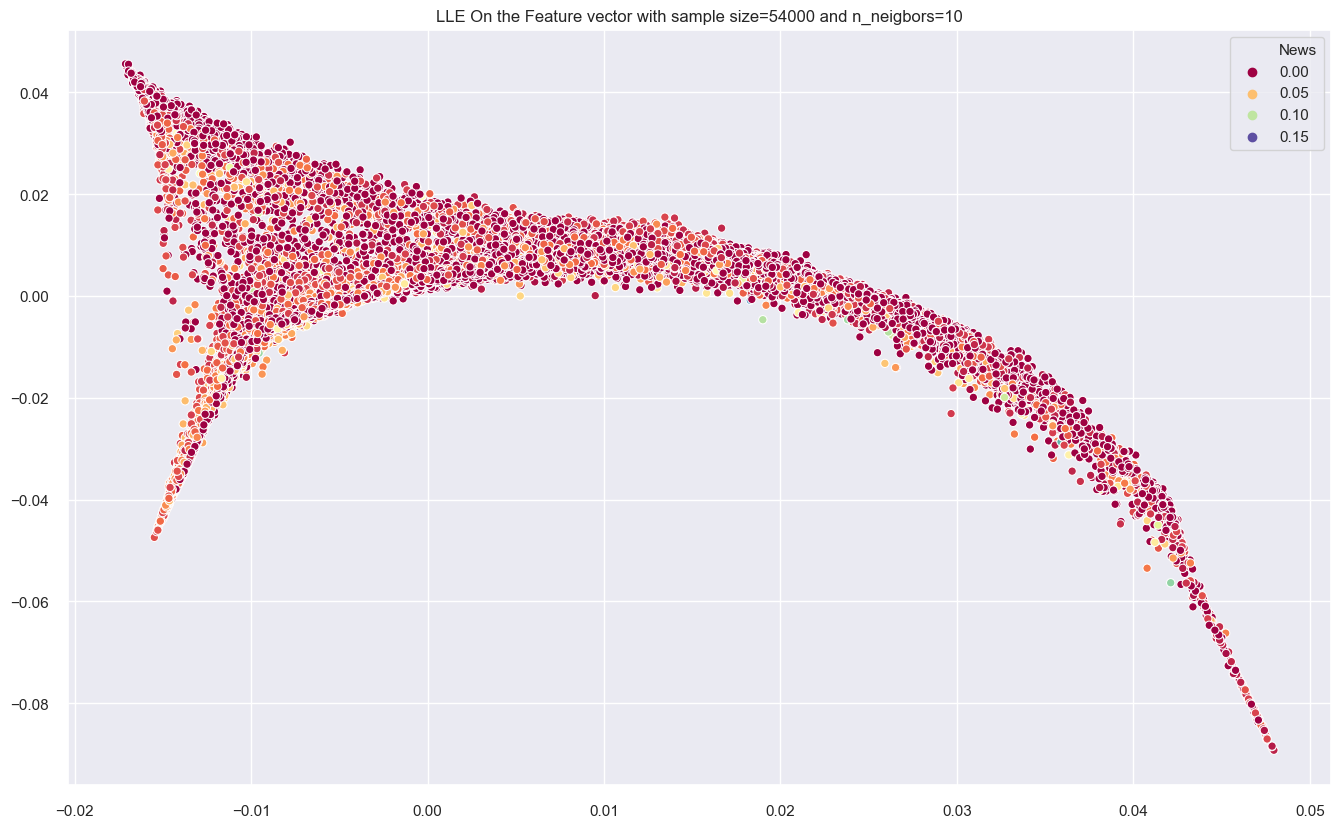

(54238,)


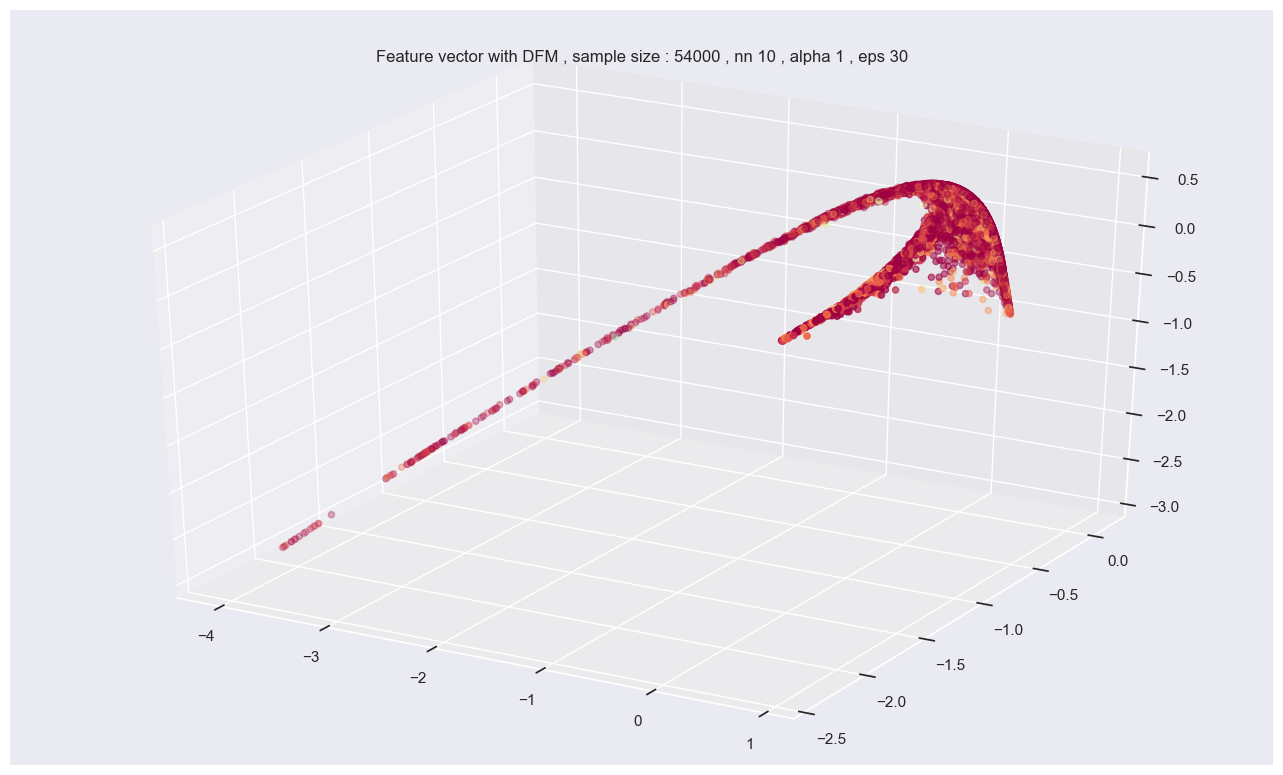

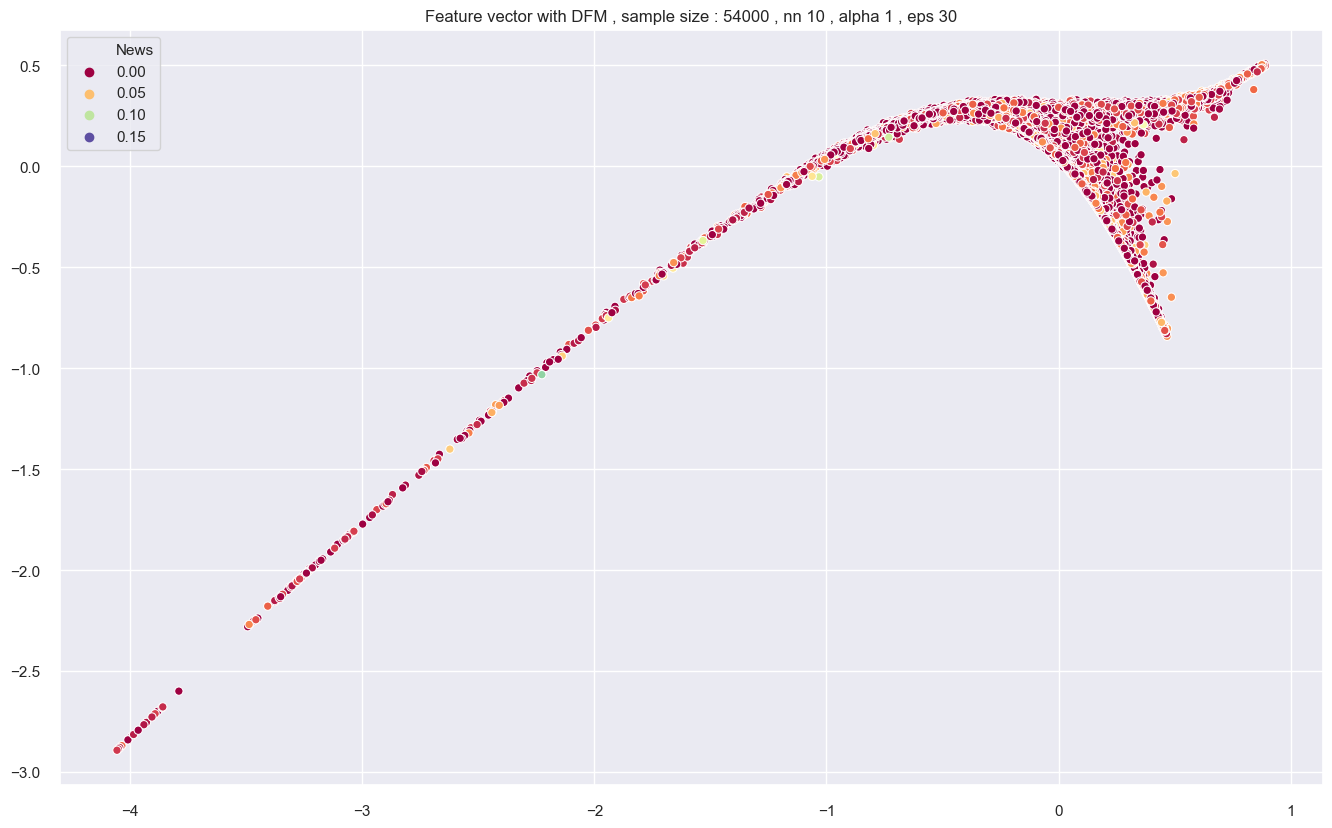

In [198]:
CURRENT_SAMPLE=15000
nn=12
# LLE_AE=pd.read_pickle("LLE_AE.pickle")
# LLE_FF=pd.read_pickle("LLE_all_data_claw")
# DFM_FF=pd.read_pickle("FF_DFM_FULL")
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(LLE_AE[:, 0], LLE_AE[:, 1], LLE_AE[:, 2], c=users_all[col], cmap=plt.cm.Spectral)
# plt.title("LLE On the Autoencoder with sample size={} and n_neigbors={} while hue represents the column {} in the feature vector.".format(54000,nn,col))
# plt.show()

# sns.scatterplot(x=LLE_AE[:, 0], y=LLE_AE[:, 2], hue=users_all[col], palette=plt.cm.Spectral)
# plt.title("LLE On the Autoencoder with sample size={} and n_neigbors={}".format(54000,nn))

# plt.show()
print(users_ff.std().sort_values()[::-1])
print(users_ff.mean().sort_values()[::-1])

def plot_all(col):
    LLE_AE=pd.read_pickle("LLE_AE.pickle")
    LLE_FF=pd.read_pickle("LLE_all_data_claw.pickle")
    DFM_FF=pd.read_pickle("FF_DFM_FULL.pickle")
    plt.rcParams['figure.figsize'] = [16.3, 10]

    nn=12

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(LLE_AE[:, 0], LLE_AE[:, 1], LLE_AE[:, 2], c=users_all[col], cmap=plt.cm.Spectral)
    plt.title("LLE On the Autoencoder with sample size={} and n_neigbors={} while hue represents the column {} in the feature vector.".format(54000,nn,col))
    plt.show()

    sns.scatterplot(x=LLE_AE[:, 0], y=LLE_AE[:, 2], hue=users_all[col], palette=plt.cm.Spectral)
    plt.title("LLE On the Autoencoder with sample size={} and n_neigbors={}".format(54000,nn))

    plt.show()

    
    LLE_AE=pd.read_pickle("LLE_all_data_claw.pickle")
    # scatter(LLE_AE,"mean_rating","LLE On the Feature vector with sample size={} and n_neigbors={}".format(CURRENT_SAMPLE,nn))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(LLE_FF[:, 0], LLE_FF[:, 1], LLE_FF[:, 2], c=users_all[col], cmap=plt.cm.Spectral)
    plt.title("LLE On the Feature vector with sample size={} and n_neigbors={}".format(54000,10))
    plt.show()

    sns.scatterplot(x=LLE_FF[:, 0], y=LLE_FF[:, 2], hue=users_all[col], palette=plt.cm.Spectral)
    plt.title("LLE On the Feature vector with sample size={} and n_neigbors={}".format(54000,10))

    plt.show()
    
    CURRENT_SAMPLE=15000
    nn=10
    LLE_AE=pd.read_pickle("FF_DFM_FULL.pickle")
    # scatter(LLE_AE,"mean_rating","Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(CUREENT_SAMPLE,nn,1,30))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(LLE_AE[:, 0], LLE_AE[:, 1], LLE_AE[:, 2], c=users_all[col], cmap=plt.cm.Spectral)
    plt.title("Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(54000,10,1,30))

    print(LLE_AE[:, 0].shape)
    plt.show()
    sns.scatterplot(x=LLE_AE[:, 0], y=LLE_AE[:, 2], hue=users_all[col], palette=plt.cm.Spectral)
    plt.title("Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(54000,10,1,30))

    plt.show()
    
plot_all("News")


In [ ]:
from sklearn.cluster import DBSCAN

curr=DBSCAN(eps=0.003,min_samples=3)
data=pd.read_pickle("LLE_AE.pickle")
data=data[:25000,:3]
model=curr.fit(data)
labels=model.labels_

fig=px.scatter_3d(x=data[:,0], y=data[:,1],z=data[:,2],color=labels,title="DB Scan",opacity=0.7,color_continuous_scale='spectral')
fig.show()

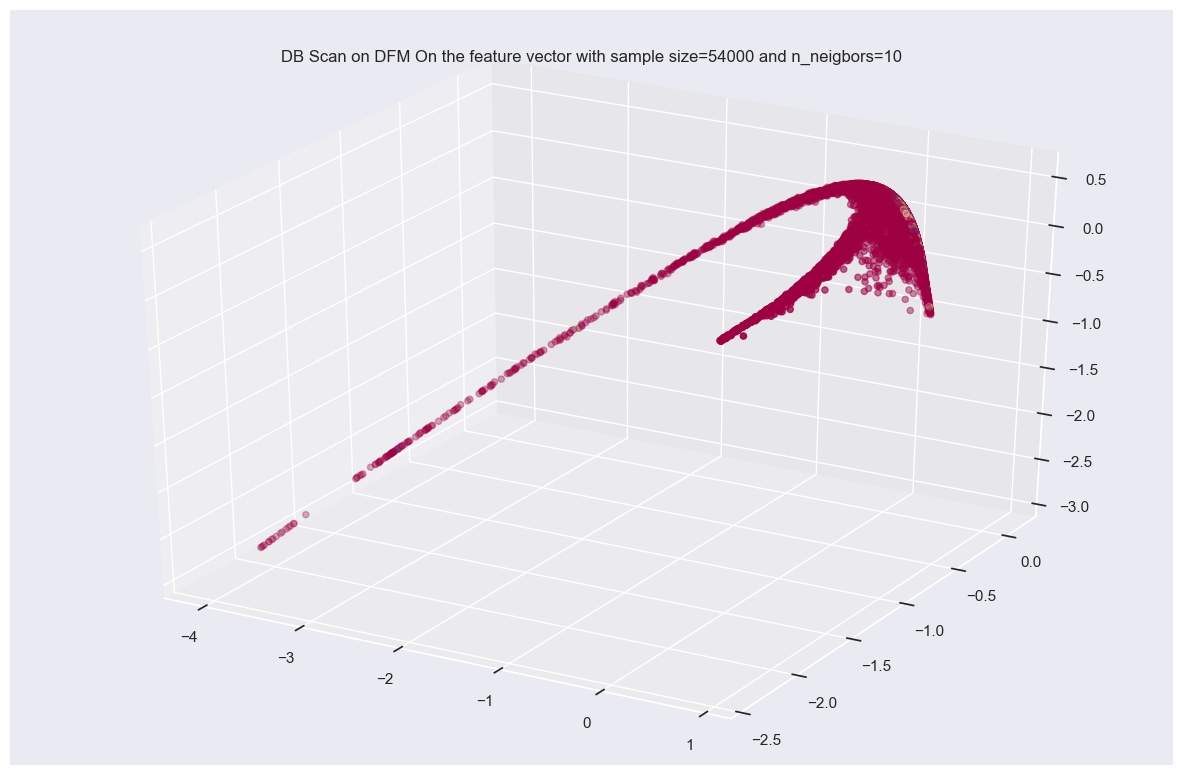

In [92]:
from sklearn.cluster import DBSCAN

curr=DBSCAN(eps=0.0005,min_samples=2)
data=pd.read_pickle("FF_DFM_FULL.pickle")
data=data[:,:3]
model=curr.fit(data)
labels=model.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap=plt.cm.Spectral)
plt.title("DB Scan on DFM On the feature vector with sample size={} and n_neigbors={}".format(54000,nn))
plt.show()


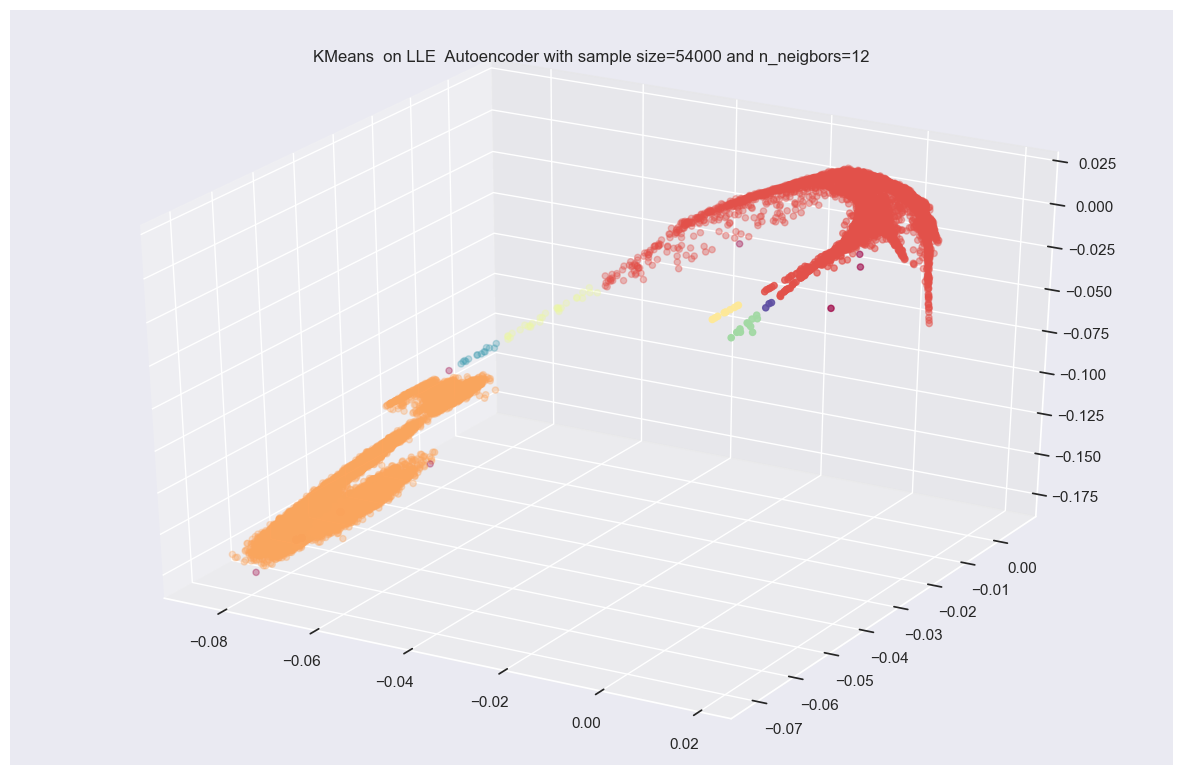

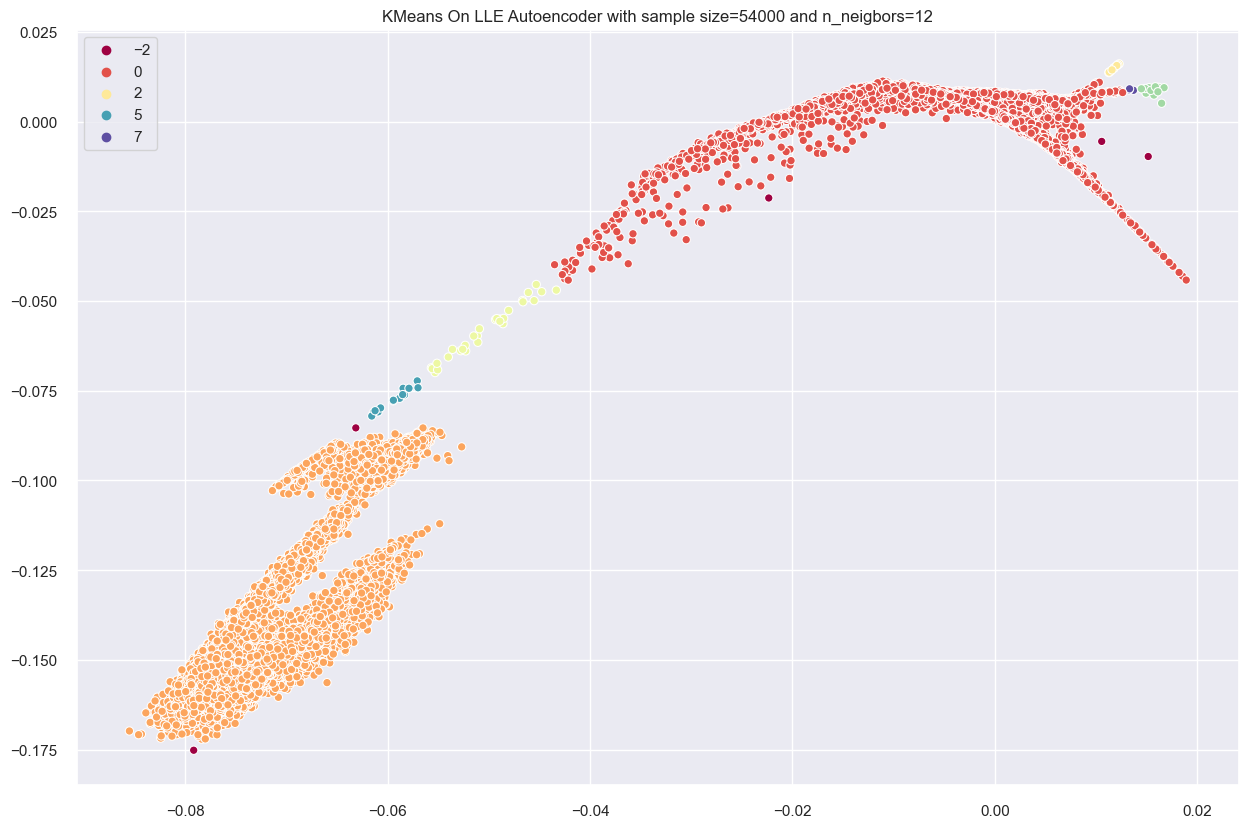

In [132]:
from sklearn.cluster import KMeans

data=pd.read_pickle("LLE_AE.pickle")
data=data[:,:3]
model = KMeans(n_clusters=2, random_state=0).fit(data)
model=curr.fit(data)
labels=model.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap=plt.cm.Spectral)
plt.title("KMeans  on LLE  Autoencoder with sample size={} and n_neigbors={}".format(54000,nn))
plt.show()

sns.scatterplot(x=data[:, 0], y=data[:, 2], hue=labels, palette=plt.cm.Spectral)
plt.title("KMeans On LLE Autoencoder with sample size={} and n_neigbors={}".format(54000,nn))

plt.show()


In [ ]:
CURRENT_SAMPLE=15000
nn=10
LLE_AE=pd.read_pickle("FF_DFM_FULL.pickle")
LLE_AE=LLE_AE[:3000,:]
scatter(LLE_AE,"Romance","Feature vector with DFM , sample size : {} , nn {} , alpha {} , eps {}".format(CUREENT_SAMPLE,nn,1,30))